# Importing libraries

In [60]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.naive_bayes as sknb
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Income dataset

In [61]:
path_to_input_file = os.path.join(os.getcwd(), 'adult.csv')
income_data = pd.read_csv(path_to_input_file)
income_data=income_data.replace(to_replace = '?', value =np.nan)
income_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Identifying missing values, if any

In [62]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [63]:
income_data.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

### Missing values found in the dataset

### Imputing Missing value with the mode

In [64]:
cols = ["workclass","occupation","native.country"]
mode=income_data.filter(cols).mode()
print(mode)

  workclass      occupation native.country
0   Private  Prof-specialty  United-States


In [65]:
income_data[cols]=income_data[cols].fillna(income_data.mode().iloc[0])
income_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Separating features and Income variables

In [66]:
# Converting the class attribute which is categorical to a numeric attribute before feeding into the model
conversion_dict = {'<=50K': 0, '>50K': 1}
income_data['income'] = income_data['income'].replace(conversion_dict)

y = income_data['income']
income_data_features = ['age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']
X = income_data[income_data_features]

In [67]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [68]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [69]:
#pd.get_dummies(X.workclass, prefix='workclass')

X = pd.get_dummies(X, columns=['workclass', 'education','marital.status','occupation','relationship','race','sex','native.country'])


In [70]:
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Splitting test and training data

In [71]:
# the random_state argument guarantees we get the same split every time we run the cell
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

# Training a GaussianNB, BernoulliNB and MultinomialNB model for classification

In [72]:
model_MNB = sknb.MultinomialNB()
model_MNB.fit(train_X, train_y)

model_BNB = sknb.BernoulliNB()
model_BNB.fit(train_X, train_y)

model_GNB = sknb.GaussianNB()
model_GNB.fit(train_X, train_y)

GaussianNB()

# Calculating MultinomialNB model accuracy on training and test data

In [73]:
predicted_y = model_MNB.predict(test_X)

In [74]:
print(f"Accuracy of the model on training data is {model_MNB.score(train_X, train_y)}")

Accuracy of the model on training data is 0.7817772317772318


In [75]:
print(f"Accuracy of the model on test data is {model_MNB.score(test_X, test_y)}")

Accuracy of the model on test data is 0.7855300331654588


# Confusion Matrix

In [76]:
cm = confusion_matrix(test_y, predicted_y)

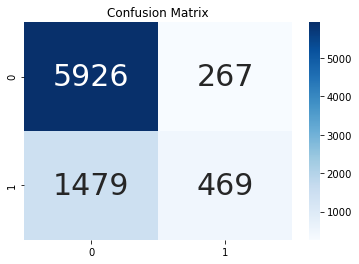

In [77]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# Calculating BernoulliNB model accuracy on training and test data

In [78]:
predicted_y = model_BNB.predict(test_X)

In [79]:
print(f"Accuracy of the model on training data is {model_BNB.score(train_X, train_y)}")

Accuracy of the model on training data is 0.7555692055692056


In [80]:
print(f"Accuracy of the model on test data is {model_BNB.score(test_X, test_y)}")

Accuracy of the model on test data is 0.7554354501903943


# Confusion Matrix

In [81]:
cm = confusion_matrix(test_y, predicted_y)

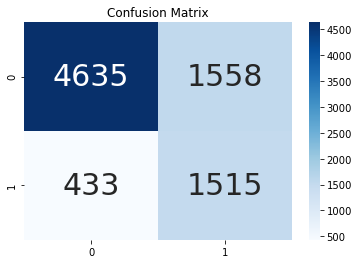

In [82]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# Calculating GaussianNB model accuracy on training and test data

In [83]:
predicted_y = model_GNB.predict(test_X)

In [84]:
print(f"Accuracy of the model on training data is {model_GNB.score(train_X, train_y)}")

Accuracy of the model on training data is 0.7947583947583947


In [85]:
print(f"Accuracy of the model on test data is {model_GNB.score(test_X, test_y)}")

Accuracy of the model on test data is 0.7957253408672154


# Confusion Matrix

In [86]:
cm = confusion_matrix(test_y, predicted_y)

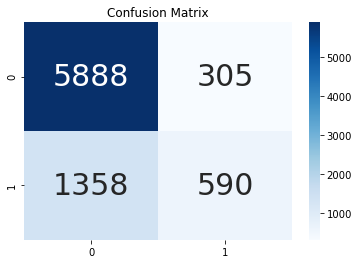

In [87]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# Creating an output csv file

In [89]:
test_X.loc[:, 'Actual'] = test_y
test_X.loc[:, 'Predicted'] = predicted_y

# Converting the class attribute back to categorical for creating an output with test results
conversion_dict = {0: '<=50K',  1: '>50K'}
test_X['Actual'] = test_X['Actual'].replace(conversion_dict)
test_X['Predicted'] = test_X['Predicted'].replace(conversion_dict)

test_X.sort_index(axis=0, inplace=True)

test_X.to_csv("output.csv", index=False)

test_X

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,Actual,Predicted
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,1,0,0,<=50K,>50K
6,38,150601,6,0,3770,40,0,0,0,1,...,0,0,0,0,0,1,0,0,<=50K,>50K
7,74,88638,16,0,3683,20,0,0,0,0,...,0,0,0,0,0,1,0,0,>50K,>50K
18,22,119592,12,0,2824,40,0,0,0,1,...,0,0,0,0,0,1,0,0,>50K,>50K
22,61,29059,9,0,2754,25,0,0,0,1,...,0,0,0,0,0,1,0,0,<=50K,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,43,260761,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,<=50K,<=50K
32556,22,310152,10,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,<=50K,<=50K
32558,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,>50K,<=50K
32559,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,<=50K,<=50K
